In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from ramannoodles import spectrafit
from ramannoodles import shoyu
import pandas as pd
import math
from ramannoodles import peakidentify

In [2]:
#If you re-call the method, it will tell you that the files are already downloaded.
shoyu.initialize_standard_library()
# open spectra library
shoyu_data_dict = pickle.load(open('../raman_spectra/shoyu_data_dict.p', 'rb'))
# list keys
sorted(shoyu_data_dict.keys())

file already in raman_spectra folder
WATER loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
CARBON MONOXIDE loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
CARBON DIOXIDE loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
FORMIC ACID loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
2-PROPANOL loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
ETHYL ALCOHOL loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
DIMETHYL KETONE loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
n-PENTANE loaded into the dictionary - shoyu_data_dict.p


['2-PROPANOL',
 'CARBON DIOXIDE',
 'CARBON MONOXIDE',
 'DIMETHYL KETONE',
 'ETHYL ALCOHOL',
 'FORMIC ACID',
 'N-PENTANE',
 'WATER']

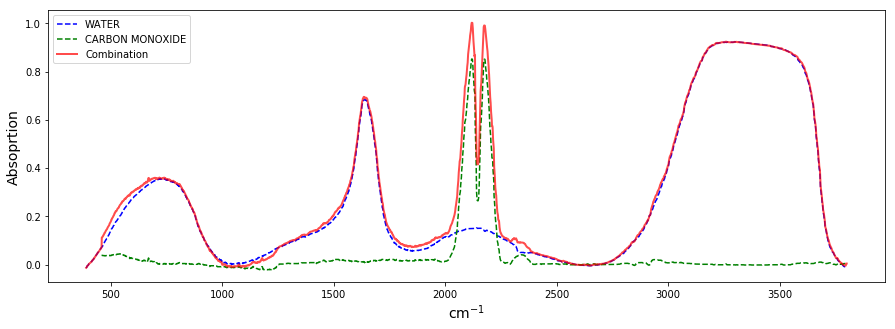

In [3]:
compound_1 = shoyu_data_dict['WATER']
compound_2 = shoyu_data_dict['CARBON MONOXIDE']
spectra_x, spectra_y = shoyu.combine_spectra(compound_1, compound_2, plot = True)

In [4]:
def peak_1d_score(rowA,rowB,scoremax):
    """
    Returns scores with respect to the repricoal of the 
    calculated Euclidean distance between peaks
    #√((x1-x2)^2) in 1D
    #√((x1-x2)^2 + (y1-y2)^2) in 2D

    Parameters:
        row A (list):  input list
        row B (list): input list
        scoremax (float): Euclidean reciprocal score divided by max score

    Returns:
        scores (list): Euclidean reciprocal scores
        peaks (tuple): peaks associated with scores
    """
    scores = []
    peaks=[]
    

    for i in range(len(rowA)):
        for j in range(len(rowB)):
            distance = np.where((rowA[i] - rowB[j]>50),np.nan,math.sqrt(sum([math.pow(rowA[i] - rowB[j], 2)])))
            if (1/(distance + 1)>.02): # Score for peaks less than 50 units apart
                scores.append(((1/(distance + 1))/scoremax))
                peaks.append((rowA[i],rowB[j]))
            else:
                pass
    return scores,peaks

def score_max(list_input, row,k):
    """
    Returns list of scores sorted with respect to the peaks related to its output max score

    Parameters:
        list_input (list):  input list
        row (list): input list
        k (int): input integer used to sort the scores / kth highest score

    Returns:
        maxscores (list): Euclidean reciprocal score divided by max score
        maxpeaks (tuple): peaks associated with max scores
    """
    try:
        scoremax= sorted(set(peak_1d_score(list_input,row,1)[0][:]))[-k]
        maxscores,maxpeaks = peak_1d_score(list_input,row,scoremax)
    
    except Exception as e:
        
        maxscores,maxpeaks = peak_1d_score(list_input,row, scoremax=1)
        
    return maxscores,maxpeaks
def score_sort(list_input, row,k):
    """
    Returns list of scores sorted

    Parameters:
        list_input (list):  input list
        row (list): input list
        k (int): input integer used to sort the scores / kth highest score

    Returns:
        sortedscores (list): sorted Euclidean distances
    """
    sortedscores = []
    sortedscores.append(score_max(list_input,row,k))
    return sortedscores

In [5]:
def test_peak_1d_score():
    """Evaluates the functionality of the peak_1D_score function"""
    # Initialize the test arguments 
    row_i=[0,1]
    row_j=[2,1]
    rowcat=row_i+row_j
    ArrayA=np.array([[0,1], [2,1],[0,3]])
    # Run Function for lists
    testscore=peak_1d_score(row_i,row_j,1)[0][:]
    testpeaks=peak_1d_score(row_i,row_j,1)[1][:]
    # Run Function for arrays
    Arrayscore=peak_1d_score(ArrayA[0],ArrayA[2],1)[0][:]
    arraycat=np.concatenate((ArrayA[0],ArrayA[2]))
    # make assertions
    assert len(row_i) == len(row_j), 'Input lengths do not match'
    assert len(Arrayscore) == len(arraycat), 'Output list length different than concatenated lists length'
    for i in range(len(rowcat)):
        assert testscore[i] <= 1, 'Output value outside acceptable range'

def test_score_max():
    """Evaluates the functionality of the score_max function"""
    # Initialize the test arguments 
    row_i=[0,1]
    row_j=[2,1]
    rowcat=row_i+row_j
    ArrayA=np.array([[0,1], [2,1],[0,3]])
    k=2
    arraycat=np.concatenate((ArrayA[0],ArrayA[1]))
    # Run Function for lists
    maxscores,maxpeaks = score_max(row_i,row_j,k)
    # Run Function for arrays
    Arrmaxscores,Arrmaxpeaks = score_max(ArrayA[0],ArrayA[1],k)
    # make assertions
    assert len(Arrmaxscores) == len(arraycat), 'Output list length different than array length'
    for i in range(len(arraycat)):
        assert Arrmaxscores[i] <= 2, 'Output value outside acceptable range'
        
def test_score_sort():
    """Evaluates the functionality of the score_sort function"""
    # Initialize the test arguments 
    row_i=[0,1]
    row_j=[2,1]
    rowcat=row_i+row_j
    ArrayA=np.array([[0,1], [2,1],[0,3]])
    k=2
    arraycat=np.concatenate((ArrayA[0],ArrayA[1]))
    # Run Previous Function to get max score normalization
    maxscores,maxpeaks = score_max(row_i,row_j,k)
    # Run Function for lists
    sortedscores=score_sort(row_i,row_j,max(maxscores))[0][0]
    # Run Function for arrays
    Arrsortedscores=score_sort(ArrayA[0],ArrayA[1],max(maxscores))[0][0]
    # make assertions
    assert len(arraycat) == len(Arrsortedscores), 'Output list length different than concatenated lists length'

In [6]:
test_peak_1d_score()
# I feel like most of my thing could be a pairwise correlation function

In [7]:
test_score_max()

In [8]:
test_score_sort()

In [9]:
compound_1 = shoyu_data_dict['WATER']
x_water = compound_1['x']
y_water = compound_1['y']
compound_2 = shoyu_data_dict['CARBON MONOXIDE']
x_co = compound_1['x']
y_co = compound_1['y']
compound_3 = shoyu_data_dict['CARBON DIOXIDE']
x_co2 = compound_1['x']
y_co2 = compound_1['y']
peaks_centers1 = spectrafit.compound_report(compound_1)[0]
print(peaks_centers1)
peaks_centers2 = spectrafit.compound_report(compound_2)[0] 
peaks_centers3 = spectrafit.compound_report(compound_3)[0] 
centerlist= [peaks_centers1,peaks_centers2,peaks_centers3]
print(centerlist)

[711.4826030832157, 1638.6886199554203, 3312.1231809302135]
[[711.4826030832157, 1638.6886199554203, 3312.1231809302135], [2109.8548231081886, 2183.58416497579], [620.6820993063426, 652.1156598823245, 680.3282599999995, 723.8750859253754, 2304.1651179999994, 2336.8755009789434, 3590.9856357827366, 3621.8934979836718, 3692.2514877580816, 3720.4308850577695]]


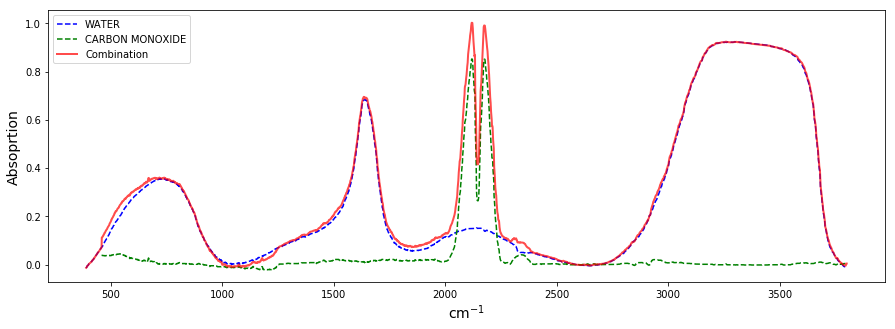

In [10]:
combined_x12,combined_y12 = shoyu.combine_spectra(compound_1,compound_2, plot = True)

In [11]:
data_peaks_combine12 = spectrafit.data_report(combined_x12,combined_y12)[0]
peakidentify.peak_1d_score(peaks_centers1,data_peaks_combine12,1)
peakidentify.peak_1d_score(centerlist[0],data_peaks_combine12,1)
peakidentify.peak_1d_score(peaks_centers1,data_peaks_combine12,max(peakidentify.peak_1d_score(peaks_centers1,data_peaks_combine12,1)[0][:]))

([0.2607316955355646, 1.0, 0.026488495998529857],
 [(711.4826030832157, 708.0),
  (1638.6886199554203, 1638.5198632531205),
  (3312.1231809302135, 3268.999999970273)])

In [12]:
peakidentify.peak_1d_score(peaks_centers1,data_peaks_combine12,1)

([0.22308466340558056, 0.8556100666907647, 0.022663823827840185],
 [(711.4826030832157, 708.0),
  (1638.6886199554203, 1638.5198632531205),
  (3312.1231809302135, 3268.999999970273)])

In [13]:
peakidentify.peak_1d_score(centerlist[0],data_peaks_combine12,1)

([0.22308466340558056, 0.8556100666907647, 0.022663823827840185],
 [(711.4826030832157, 708.0),
  (1638.6886199554203, 1638.5198632531205),
  (3312.1231809302135, 3268.999999970273)])

In [14]:
peakidentify.peak_1d_score(peaks_centers1,data_peaks_combine12,max(peakidentify.peak_1d_score(peaks_centers1,data_peaks_combine12,1)[0][:]))

([0.2607316955355646, 1.0, 0.026488495998529857],
 [(711.4826030832157, 708.0),
  (1638.6886199554203, 1638.5198632531205),
  (3312.1231809302135, 3268.999999970273)])

In [15]:
peakidentify.peak_1d_score(peaks_centers1,data_peaks_combine12,sorted(set(peakidentify.peak_1d_score(peaks_centers1,data_peaks_combine12,1)[0][:]))[-2])

([1.0, 3.8353603229784428, 0.10159292656813466],
 [(711.4826030832157, 708.0),
  (1638.6886199554203, 1638.5198632531205),
  (3312.1231809302135, 3268.999999970273)])

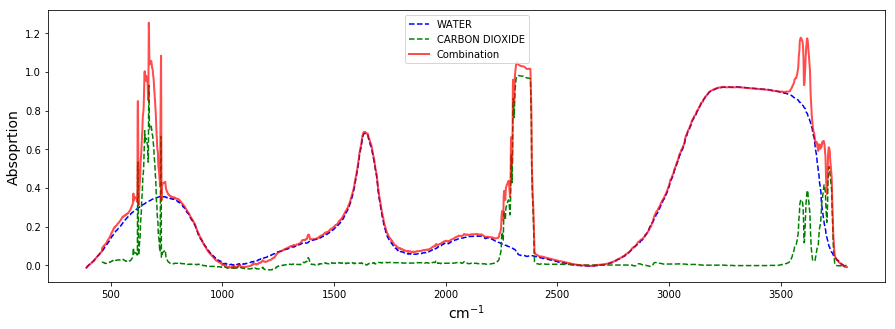

In [16]:
combined_x13,combined_y13  = shoyu.combine_spectra(compound_1, compound_3, plot = True)

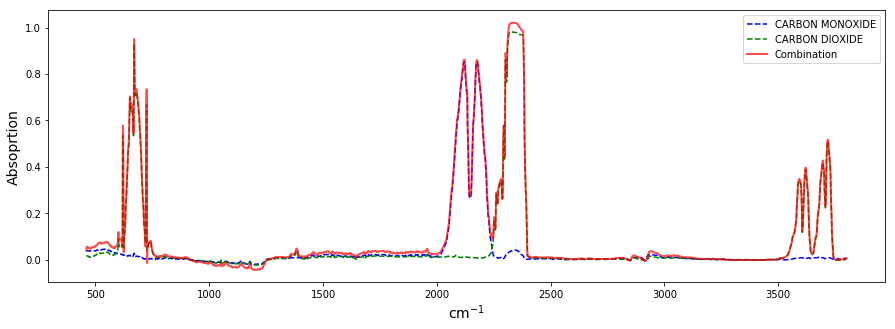

In [17]:
combined_x23,combined_y23  = shoyu.combine_spectra(compound_2, compound_3, plot = True)

In [18]:
data_peaks_combine12 = spectrafit.data_report(combined_x12,combined_y12)


In [19]:
data_peaks_combine13 = spectrafit.data_report(combined_x13,combined_y13)


In [20]:
data_peaks_combine23 = spectrafit.data_report(combined_x23,combined_y23)


In [21]:
combinedlist=[data_peaks_combine12,data_peaks_combine13,data_peaks_combine23]

In [22]:
print(peakidentify.score_sort(data_peaks_combine12[0],peaks_centers1,1))

[([0.2607316955355646, 1.0, 0.026488495998529857], [(708.0, 711.4826030832157), (1638.5198632531205, 1638.6886199554203), (3268.999999970273, 3312.1231809302135)])]


In [23]:
print(peaks_centers1)
print(data_peaks_combine12)
print(data_peaks_combine12[0])

[711.4826030832157, 1638.6886199554203, 3312.1231809302135]
([708.0, 1638.5198632531205, 2110.0000000000095, 2184.149153919652, 3268.999999970273], [139.83033669023976, 60.961055076687835, 29.158069800423903, 21.50620007219589, 265.20281991704775], [170.38584511373327, 126.94038930286825, 79.65940189444206, 56.3882637636494, 858.1037539938558], 390, 3801)
[708.0, 1638.5198632531205, 2110.0000000000095, 2184.149153919652, 3268.999999970273]


In [24]:
print(peaks_centers2)
print(list(combinedlist[0][:][1]))
print(centerlist[0])

[2109.8548231081886, 2183.58416497579]
[139.83033669023976, 60.961055076687835, 29.158069800423903, 21.50620007219589, 265.20281991704775]
[711.4826030832157, 1638.6886199554203, 3312.1231809302135]


In [25]:
data=peakidentify.score_sort(data_peaks_combine13[0],peaks_centers1,2)[0][1][:]
print(data)

[(679.999999892973, 711.4826030832157), (734.9999999999991, 711.4826030832157), (1638.7961315272316, 1638.6886199554203)]


In [26]:

compdf = pd.DataFrame(data=score_sort(data_peaks_combine12[0],peaks_centers1,2)[0][0][:],columns=['WATER_vs_CO_WATER_Scores'])
compdf=compdf.assign(WATER_vs_CO_WATER_Peaks=score_sort(data_peaks_combine12[0],peaks_centers1,2)[0][1][:])
compdf2=pd.DataFrame(data=score_sort(data_peaks_combine12[0],peaks_centers2,2)[0][0][:],columns=['CO_vs_CO_WATER_Scores'])
compdf2=compdf2.assign(CO_vs_CO_WATER_scores=score_sort(data_peaks_combine12[0],peaks_centers2,2)[0][1][:])
data=score_sort(data_peaks_combine13[0],peaks_centers1,2)
print(data)


[([0.7547854700311715, 1.0, 22.13737313524039], [(679.999999892973, 711.4826030832157), (734.9999999999991, 711.4826030832157), (1638.7961315272316, 1638.6886199554203)])]


In [27]:
print(compdf)
print(compdf2)

   WATER_vs_CO_WATER_Scores                   WATER_vs_CO_WATER_Peaks
0                  1.000000                (708.0, 711.4826030832157)
1                  3.835360  (1638.5198632531205, 1638.6886199554203)
2                  0.101593   (3268.999999970273, 3312.1231809302135)
   CO_vs_CO_WATER_Scores                     CO_vs_CO_WATER_scores
0               1.366591  (2110.0000000000095, 2109.8548231081886)
1               1.000000     (2184.149153919652, 2183.58416497579)


In [28]:
k_range = range(1,len(data_peaks_combine12))
for k in k_range:
    compdf = pd.DataFrame(data=score_sort(data_peaks_combine12[0],peaks_centers1,k)[0][0][:],columns=['Score for max peak #'+str(k)])
    compdf=compdf.assign(peaks=score_sort(data_peaks_combine12[0],peaks_centers1,k)[0][1][:])
    print(compdf)

   Score for max peak #1                                     peaks
0               0.260732                (708.0, 711.4826030832157)
1               1.000000  (1638.5198632531205, 1638.6886199554203)
2               0.026488   (3268.999999970273, 3312.1231809302135)
   Score for max peak #2                                     peaks
0               1.000000                (708.0, 711.4826030832157)
1               3.835360  (1638.5198632531205, 1638.6886199554203)
2               0.101593   (3268.999999970273, 3312.1231809302135)
   Score for max peak #3                                     peaks
0               9.843205                (708.0, 711.4826030832157)
1              37.752238  (1638.5198632531205, 1638.6886199554203)
2               1.000000   (3268.999999970273, 3312.1231809302135)
   Score for max peak #4                                     peaks
0               0.223085                (708.0, 711.4826030832157)
1               0.855610  (1638.5198632531205, 1638.6886199554

In [29]:
k_range = range(1,len(data_peaks_combine23))
for i in range(len(combinedlist)):
    for j in range(len(centerlist)):
        for k in k_range:
            compdf = pd.DataFrame(data=score_sort(centerlist[j],combinedlist[0][:][i],k)[0][0][:],columns=['Score for max peak k#'+str(k)])
            compdf=compdf.assign(peaks=score_sort(centerlist[j],combinedlist[0][:][i],k)[0][1][:])
            print(compdf)

   Score for max peak k#1                                     peaks
0                0.260732                (711.4826030832157, 708.0)
1                1.000000  (1638.6886199554203, 1638.5198632531205)
2                0.026488   (3312.1231809302135, 3268.999999970273)
   Score for max peak k#2                                     peaks
0                1.000000                (711.4826030832157, 708.0)
1                3.835360  (1638.6886199554203, 1638.5198632531205)
2                0.101593   (3312.1231809302135, 3268.999999970273)
   Score for max peak k#3                                     peaks
0                9.843205                (711.4826030832157, 708.0)
1               37.752238  (1638.6886199554203, 1638.5198632531205)
2                1.000000   (3312.1231809302135, 3268.999999970273)
   Score for max peak k#4                                     peaks
0                0.223085                (711.4826030832157, 708.0)
1                0.855610  (1638.6886199554203, 

In [30]:
data=score_sort(centerlist[0],combinedlist[0][:][0],1)[0]
print(data)

([0.2607316955355646, 1.0, 0.026488495998529857], [(711.4826030832157, 708.0), (1638.6886199554203, 1638.5198632531205), (3312.1231809302135, 3268.999999970273)])


In [31]:
scores=score_sort(centerlist[0],combinedlist[0][:][0],1)[0][0][:]
peaks=score_sort(centerlist[0],combinedlist[0][:][0],1)[0][1][:]
print(peaks)
compdf = pd.DataFrame(data=scores,columns=['WATER_comp_CO_Scores'])
compdf=compdf.assign(WATER__comp_CO_Peaks=peaks)
scores=score_sort(centerlist[0],combinedlist[0][:][0],1)[0][0][:]
peaks=score_sort(centerlist[0],combinedlist[0][:][0],1)[0][1][:]
print(peaks)
compdf=compdf.assign(Peaks=peaks)
print(compdf)

[(711.4826030832157, 708.0), (1638.6886199554203, 1638.5198632531205), (3312.1231809302135, 3268.999999970273)]
[(711.4826030832157, 708.0), (1638.6886199554203, 1638.5198632531205), (3312.1231809302135, 3268.999999970273)]
   WATER_comp_CO_Scores                      WATER__comp_CO_Peaks  \
0              0.260732                (711.4826030832157, 708.0)   
1              1.000000  (1638.6886199554203, 1638.5198632531205)   
2              0.026488   (3312.1231809302135, 3268.999999970273)   

                                      Peaks  
0                (711.4826030832157, 708.0)  
1  (1638.6886199554203, 1638.5198632531205)  
2   (3312.1231809302135, 3268.999999970273)  


In [32]:
compdf = pd.DataFrame(data=scores,columns=['WATER_comp_CO_Scores'])

In [33]:
# you will need to download the file yourself from the team google drive and edit location
df = pd.read_excel('../examples/FormicAcid_3percentconc_400C_5s_00000.xlsx', names=('x', 'y'))

In [34]:
fig = plt.figure(figsize=(6,4), dpi = 300)
x_data = df['x'].values
y_data = df['y'].values

<Figure size 1800x1200 with 0 Axes>

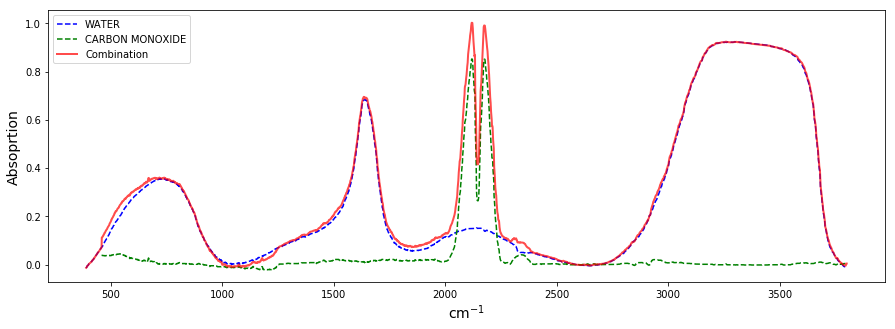

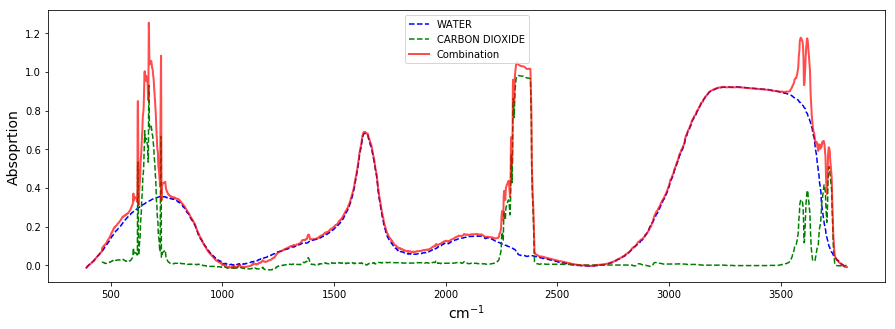

In [35]:
compound_1 = shoyu_data_dict['WATER']
compound_2 = shoyu_data_dict['CARBON MONOXIDE']
compound_3 = shoyu_data_dict['ETHYL ALCOHOL']
compound_4 = shoyu_data_dict['FORMIC ACID']
compound_5 = shoyu_data_dict['CARBON DIOXIDE']
H2O_CO_x, H2O_CO_y = shoyu.combine_spectra(compound_1, compound_2, plot = True)
H2O_CO2_x, H2O_CO2_y = shoyu.combine_spectra(compound_1, compound_5, plot = True)

In [36]:
H2O_CO_x = np.asarray(H2O_CO_x)
H2O_CO_y = np.asarray(H2O_CO_y)
H2O_CO2_x = np.asarray(H2O_CO2_x)
H2O_CO2_y = np.asarray(H2O_CO2_y)

In [37]:
water_peaks = spectrafit.compound_report(compound_1)[0]
co_peaks = spectrafit.compound_report(compound_2)[0]
co2_peaks = spectrafit.compound_report(compound_5)[0]
H2O_CO_peaks = spectrafit.data_report(H2O_CO_x, H2O_CO_y)
print(H2O_CO_peaks)
H2O_CO2_peaks = spectrafit.data_report(H2O_CO2_x, H2O_CO2_y)


([708.0, 1638.5198632531205, 2110.0000000000095, 2184.149153919652, 3268.999999970273], [139.83033669023976, 60.961055076687835, 29.158069800423903, 21.50620007219589, 265.20281991704775], [170.38584511373327, 126.94038930286825, 79.65940189444206, 56.3882637636494, 858.1037539938558], 390, 3801)


In [38]:
print(H2O_CO2_peaks)

([611.000000000001, 652.0861593999174, 679.999999892973, 734.9999999999991, 1638.7961315272316, 2311.999999999999, 2328.999999999997, 3581.0013861296484, 3609.0, 3706.0000000000005], [75.09114632969823, 10.937001979860723, 21.010240407977527, 98.29338631999273, 56.59482438462332, 46.99283430551648, 34.333859194114105, 477.2122348176551, 500.0, 500.0], [37.085977017210084, 13.516792432000907, 45.421528229873324, 98.86765889345658, 115.21576739579582, 2.9267699375168377e-12, 115.07595288965948, 1018.2009391534065, 325.6929161464435, 3.3507325802872856e-09], 390, 3797)


Text(0, 0.5, 'Absoprtion')

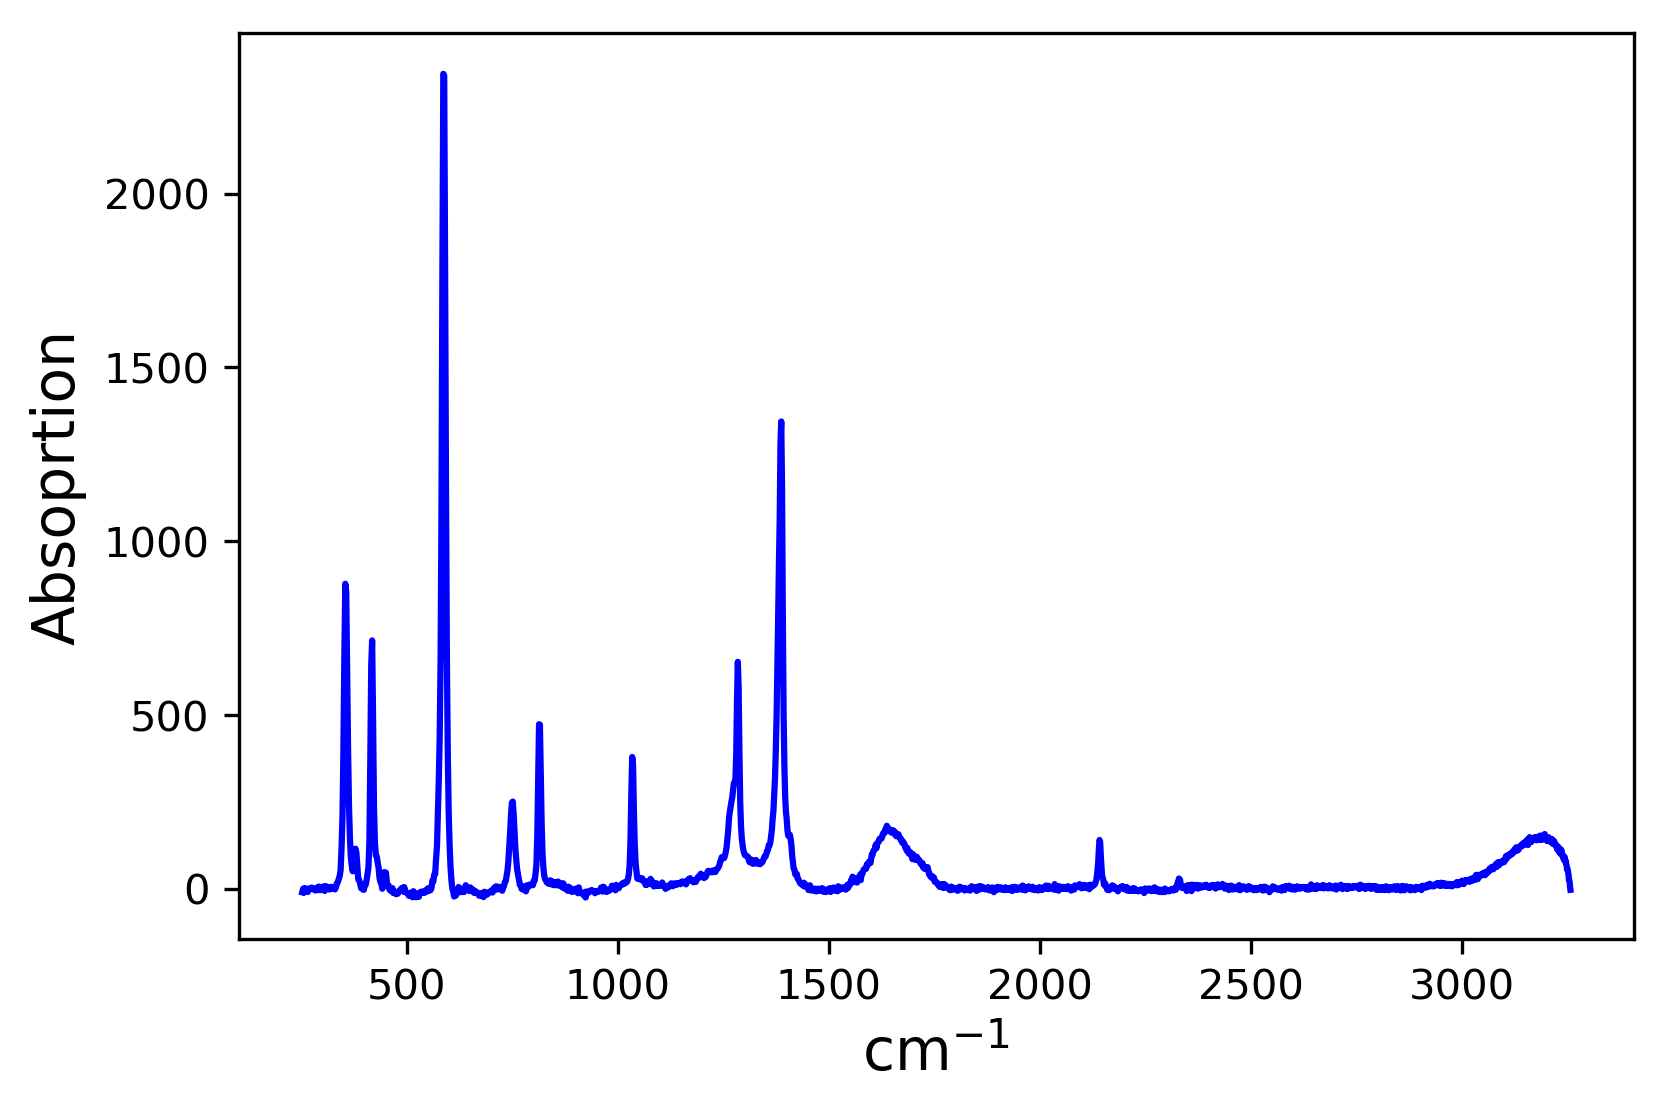

In [39]:
fig = plt.figure(figsize=(6,4), dpi = 300)
plt.plot(x_data, y_data, color = 'blue',label ='Experimental')
#plt.plot(H2O_CO_x, H2O_CO_y, color = 'red', label = 'Sample Spectra')
plt.xlabel('cm$^{-1}$', fontsize=14)
plt.ylabel('Absoprtion', fontsize=14)

In [40]:
#Exp_peaks = spectrafit.data_report(x_data, y_data)